## Guide to Ensemble Regression for Biodiversity Health Index Prediction

### 1. **Introduction**
   - **Objective**: Predict the Biodiversity Health Index using ecological factors through ensemble regression methods. Ensemble methods improve predictive accuracy by combining multiple models.
   - This notebook explores various ensemble regression methods to predict the Biodiversity Health Index using a dataset on ecological factors.


### 2. **Data Loading and Preparation**
   - **Dataset**: A public dataset on ecological factors affecting biodiversity health.
   - **Steps**:
     - Load the dataset using `pandas`.
     - Preview the data, check for missing values, and explore summary statistics.

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('SDG_15_Life_on_Land_Dataset.csv')

In [15]:
# Display the first few rows of the dataset
print("\nDataset Preview:")
data.head()


Dataset Preview:


,Year,WaterQualityIndex,ClimateChangeImpactScore,LandUseChange,InvasiveSpeciesCount,ConservationFunding,EcoTourismImpact,ForestCoverChange,SoilQualityIndex,WaterUsage,RenewableEnergyUsage,CarbonEmissionLevels,AgriculturalIntensity,HabitatConnectivity,SpeciesReintroductionEfforts,PollinatorDiversity,BiodiversityHealthIndex
0,2010,35,7.542535,6.630073,39,46,1.193810,0.032204,70,33,13,22,1.419332,1.671324,9.311312,0.270434,0.194332
1,2010,13,1.617642,6.477132,45,18,8.484718,-4.803485,69,67,57,63,3.048794,5.815305,4.698086,0.729916,0.525779
2,2010,10,0.904817,9.069428,28,59,3.412444,-2.563852,72,85,37,46,7.863218,9.543694,2.080495,0.068508,0.684795
3,2010,36,7.060190,7.061932,37,88,9.718453,3.425382,64,85,96,60,1.065595,4.938359,2.192657,0.145065,0.926146
4,2010,24,8.439246,4.504786,41,88,9.118186,-1.295086,12,0,85,61,9.785784,2.114002,7.405189,0.809798,0.126345


In [17]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Year                            0
WaterQualityIndex               0
ClimateChangeImpactScore        0
LandUseChange                   0
InvasiveSpeciesCount            0
ConservationFunding             0
EcoTourismImpact                0
ForestCoverChange               0
SoilQualityIndex                0
WaterUsage                      0
RenewableEnergyUsage            0
CarbonEmissionLevels            0
AgriculturalIntensity           0
HabitatConnectivity             0
SpeciesReintroductionEfforts    0
PollinatorDiversity             0
BiodiversityHealthIndex         0
dtype: int64


The dataset has 1000 rows with 17 columns. The dataset have no missing values. and all of the data are numerical. year is int but it has to be in datatimeformat.

In [21]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
data.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Year,1000.0,2014.840000,3.158540,2010.000000,2012.000000,2015.000000,2018.000000,2020.000000
WaterQualityIndex,1000.0,49.922000,29.283604,0.000000,25.000000,49.000000,75.000000,100.000000
ClimateChangeImpactScore,1000.0,4.928142,2.855896,0.001884,2.383995,4.957500,7.397943,9.970782
LandUseChange,1000.0,5.113608,2.847654,0.004428,2.708338,5.224919,7.586436,9.997138
InvasiveSpeciesCount,1000.0,25.018000,14.461979,0.000000,13.000000,24.000000,38.000000,50.000000
ConservationFunding,1000.0,49.741000,28.918129,0.000000,24.000000,49.000000,76.000000,100.000000
EcoTourismImpact,1000.0,4.940977,2.890359,0.002270,2.487451,4.762296,7.423117,9.987929
ForestCoverChange,1000.0,-0.019767,2.901123,-4.960816,-2.566369,0.012879,2.538136,4.994607
SoilQualityIndex,1000.0,50.089000,28.878834,0.000000,24.000000,51.000000,75.000000,100.000000
WaterUsage,1000.0,51.456000,28.799852,0.000000,28.000000,53.000000,76.000000,100.000000


ForestCoverChange have negative values so further analysis must be considered. Since the dataset contains mutiple ranges(PollinatorDiversity 0-1 while ConservationFunding range from 0-100) scaling might be important for certain machine learning models.

### 3. **Exploratory Data Analysis (EDA)**
   - **Purpose**: Understand the data distribution and relationships.
   - **Key Visualizations**:
     - Distribution of `BiodiversityHealthIndex`.
     - Pair plots to show relationships between variables.
     - Correlation matrix to identify the strongest predictors.


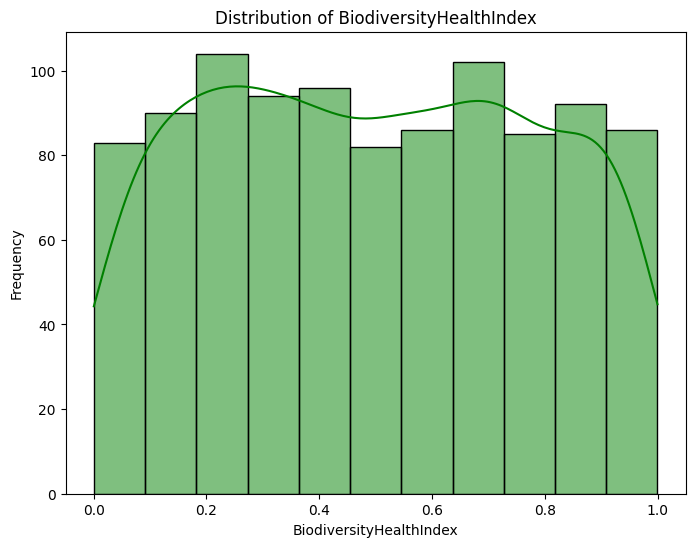

In [23]:
# Distribution of BiodiversityHealthIndex
plt.figure(figsize=(8, 6))
sns.histplot(data['BiodiversityHealthIndex'], kde=True, color='green')
plt.title('Distribution of BiodiversityHealthIndex')
plt.xlabel('BiodiversityHealthIndex')
plt.ylabel('Frequency')
plt.show()

The **distribution** of the BiodiversityHealthIndex shows that the values are distributed quite evenly between 0 and 1, with only two small spikes.

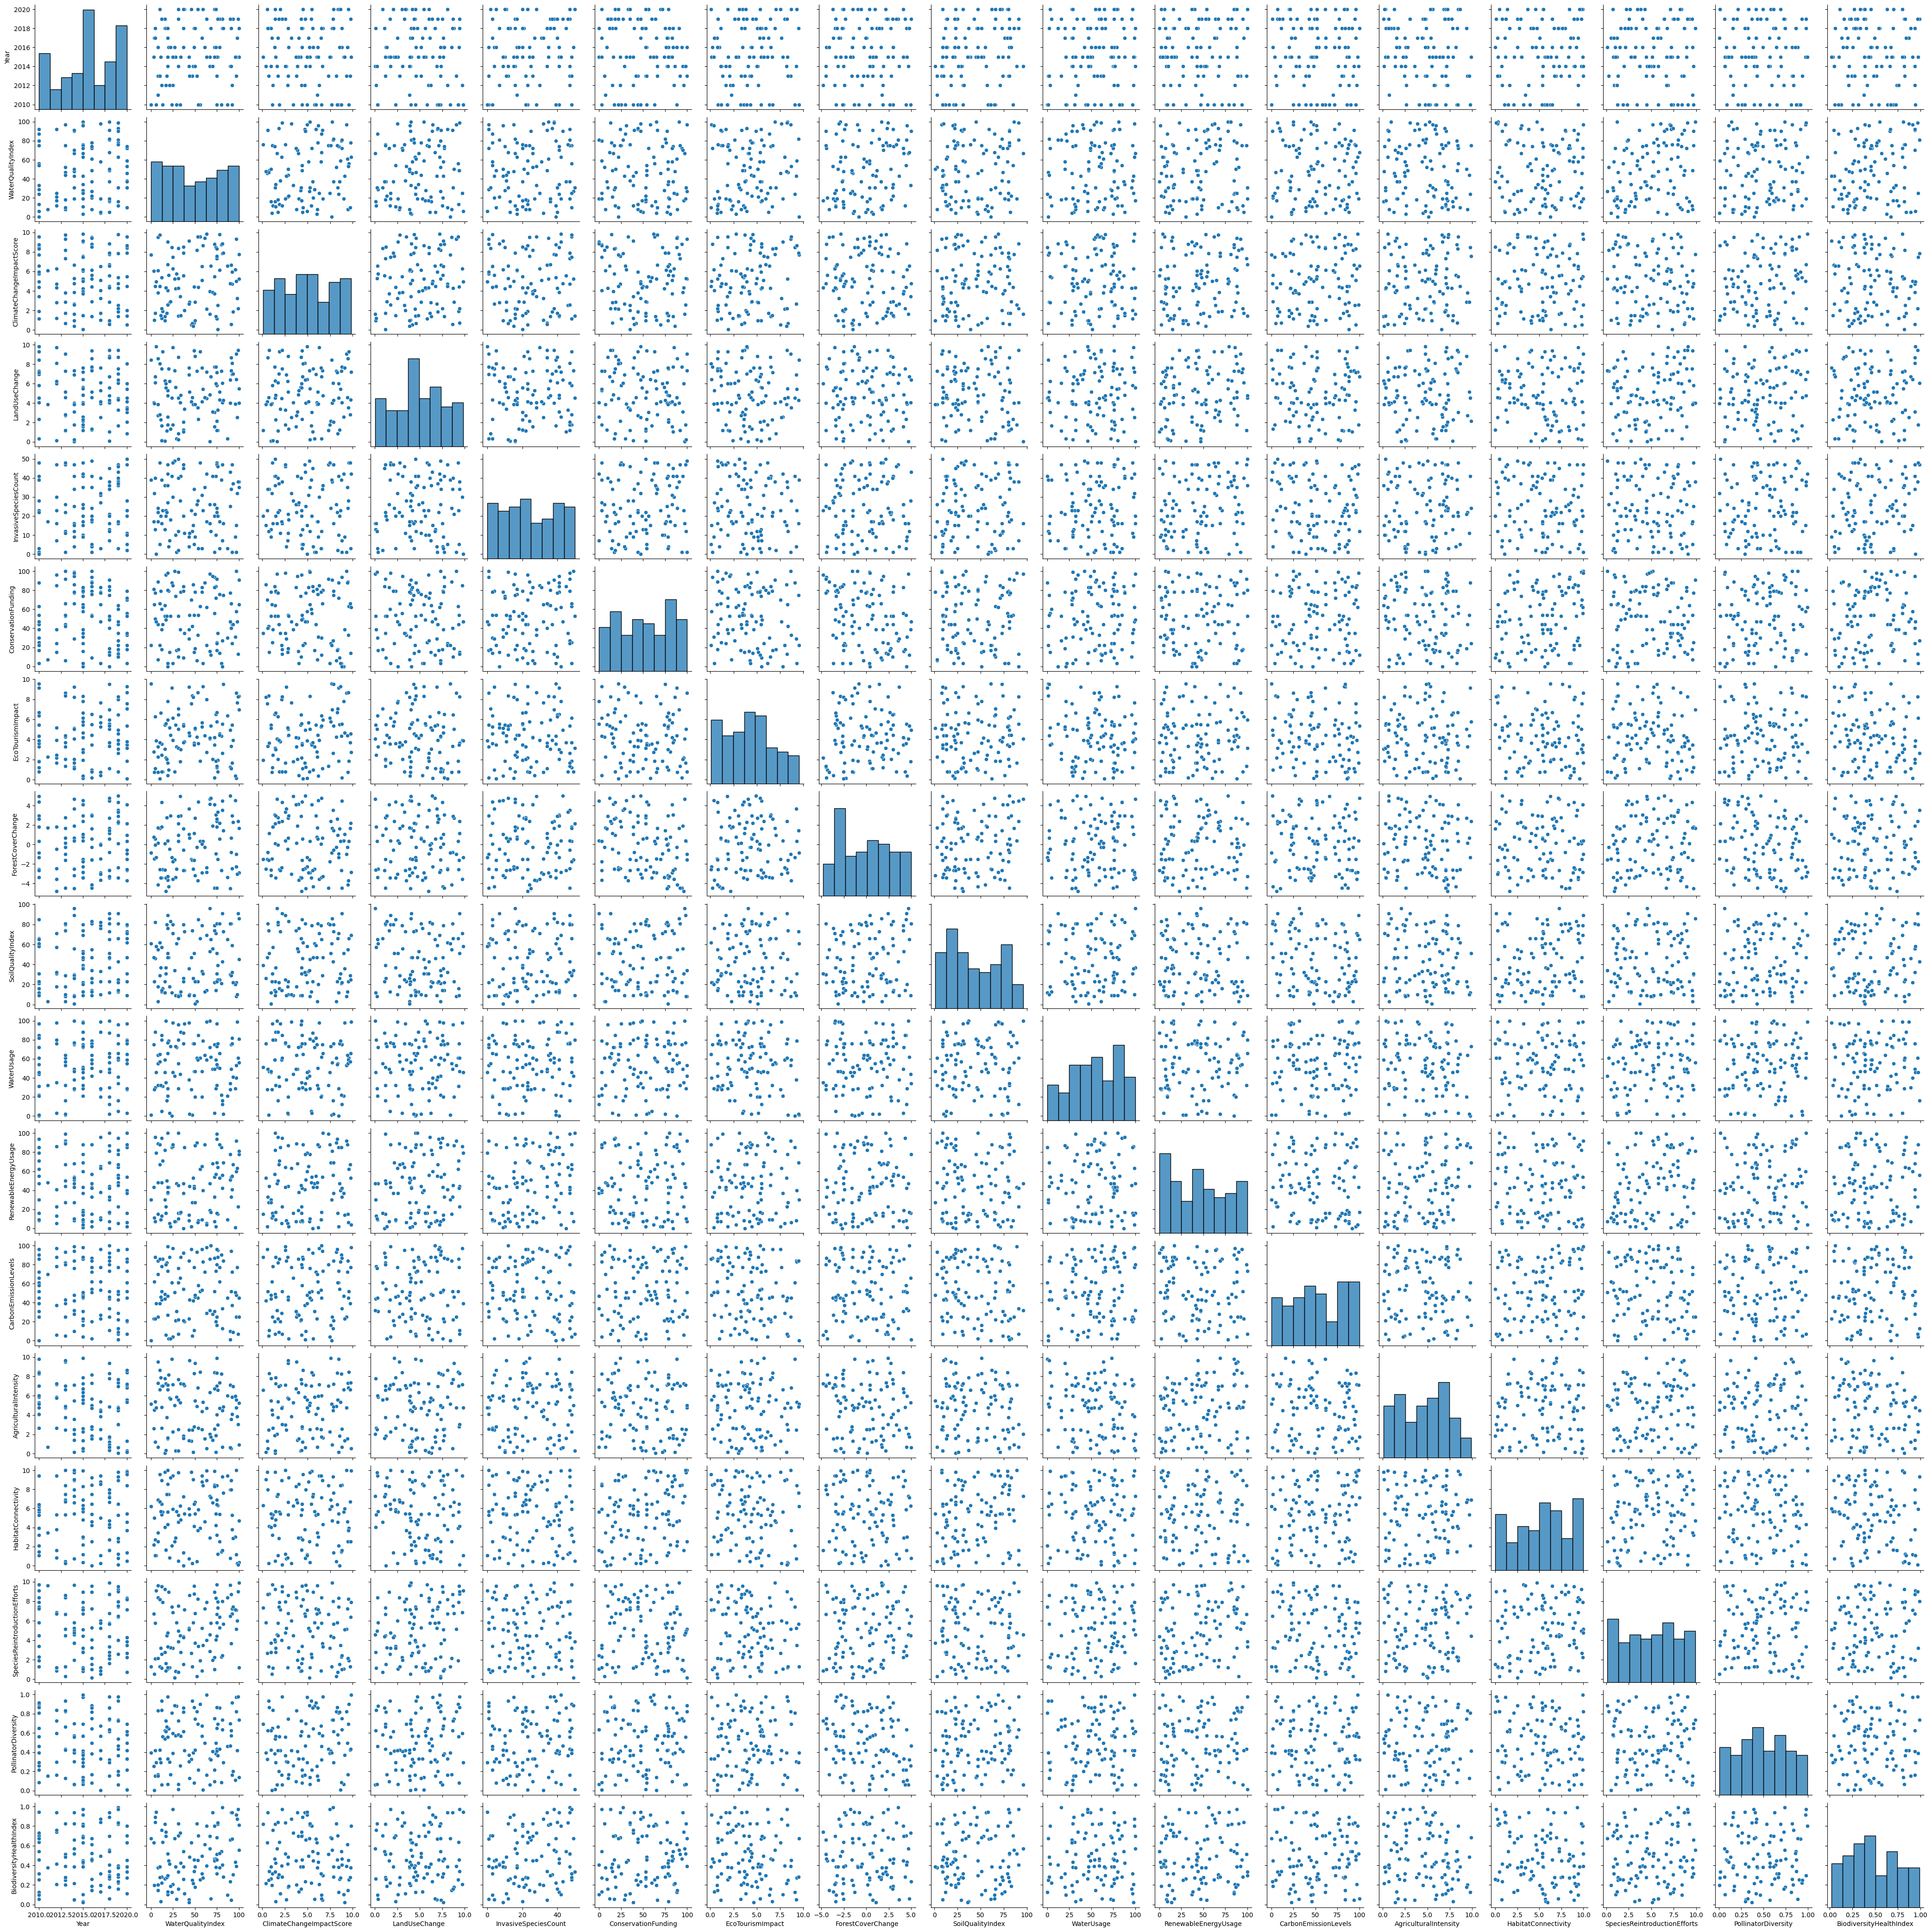

In [25]:
# Pairplot to visualize relationships between variables
sns.pairplot(data.sample(100))  # Sampling for performance optimization
plt.show()

The **pairplot** is where we get most of our information to build our model – but it looks as if might be a tough one, considering that there are no clear patterns or trends visible, not between the BiodiversityHealthIndex and the other variables, or even between any of the other variables. But let's see where it goes.

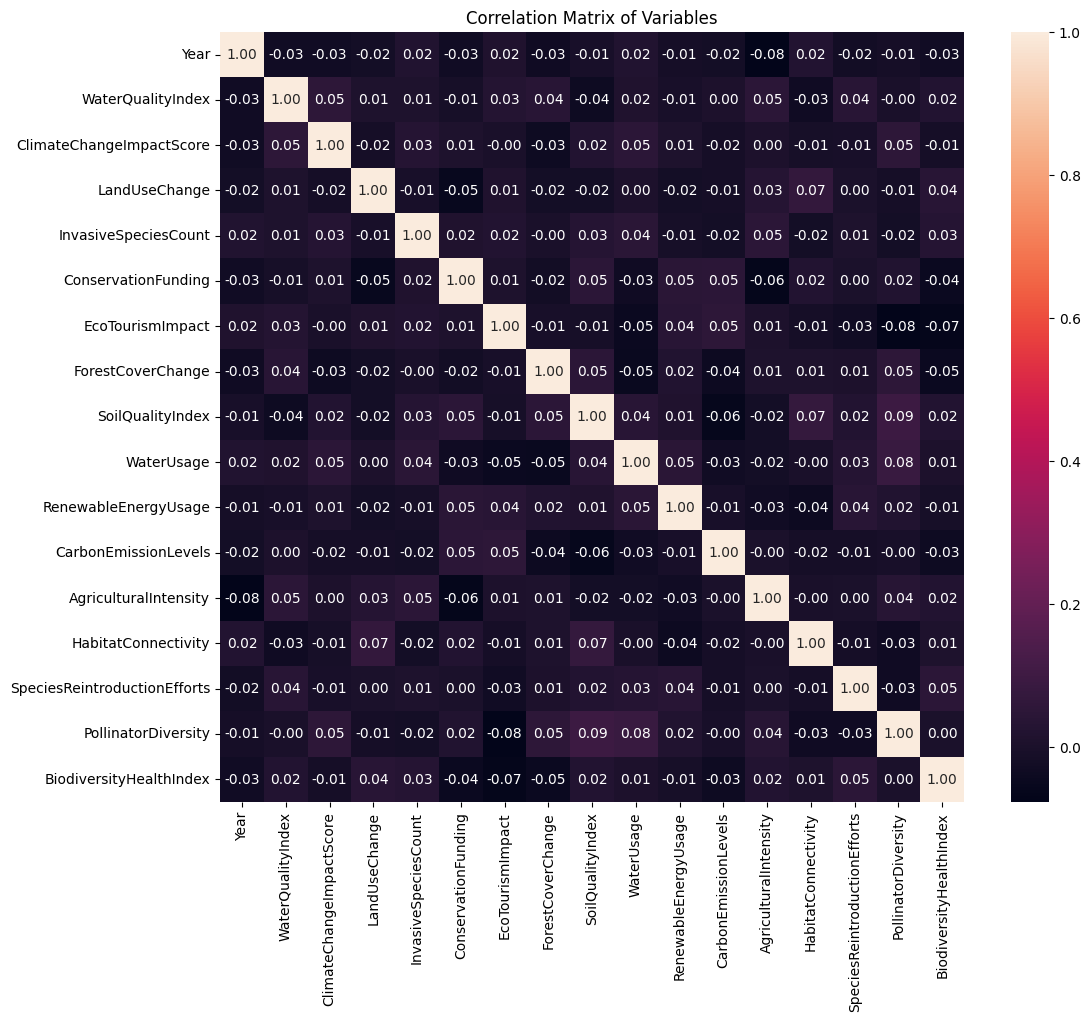

In [29]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

In [31]:
# Focus on correlations with BiodiversityHealthIndex
bhi_corr = corr_matrix['BiodiversityHealthIndex'].sort_values(ascending=False)
print("\nCorrelations with BiodiversityHealthIndex:")
print(bhi_corr)


Correlations with BiodiversityHealthIndex:
BiodiversityHealthIndex         1.000000
SpeciesReintroductionEfforts    0.047989
LandUseChange                   0.040171
InvasiveSpeciesCount            0.031199
SoilQualityIndex                0.023898
AgriculturalIntensity           0.023563
WaterQualityIndex               0.023446
HabitatConnectivity             0.008568
WaterUsage                      0.007323
PollinatorDiversity             0.002505
RenewableEnergyUsage           -0.010840
ClimateChangeImpactScore       -0.014917
Year                           -0.026502
CarbonEmissionLevels           -0.034371
ConservationFunding            -0.042731
ForestCoverChange              -0.046136
EcoTourismImpact               -0.066228
Name: BiodiversityHealthIndex, dtype: float64


The **correlation matrix** confirms what the pairplot suggested – there's very little correlation between the independent variables and the biodiversity index. Considering that strong correlation is at a value of 1, and our variables are much, much smaller at values closer to zero, there might be problems fitting a model. This weak relationship may result in poor model performance. We'll forge ahead for now and see what happens!

### 4. **Feature Selection**
   - **Approach**:
     - Select top variables based on their correlation with `BiodiversityHealthIndex`.
     - Prepare the features (`X`) and target variable (`y`) for modeling.
     - This narrows down the dataset to the six most impactful variables for predicting BiodiversityHealthIndex, based on previous correlation analysis. By focusing on the top six variables, it aims to enhance model accuracy and simplicity. The last command previews the refined dataset, ensuring the adjustments align with our predictive modelling objectives.


In [35]:
# Selected top correlated variables positively and negatively 
# Select top 3 positively correlated and bottom 3 negatively correlated variables
positively_correlated = bhi_corr.head(4).index[1:] # Exclude 'BiodiversityHealthIndex' itself
negatively_correlated = bhi_corr.tail(3).index

# Combine selected variables
selected_variables = list(positively_correlated) + list(negatively_correlated)

# Create a new DataFrame with BiodiversityHealthIndex and selected variables
selected_df = df[['BiodiversityHealthIndex'] + selected_variables]

# Display the new DataFrame
selected_df.head()

,BiodiversityHealthIndex,SpeciesReintroductionEfforts,LandUseChange,InvasiveSpeciesCount,ConservationFunding,ForestCoverChange,EcoTourismImpact
0,0.194332,9.311312,6.630073,39,46,0.032204,1.193810
1,0.525779,4.698086,6.477132,45,18,-4.803485,8.484718
2,0.684795,2.080495,9.069428,28,59,-2.563852,3.412444
3,0.926146,2.192657,7.061932,37,88,3.425382,9.718453
4,0.126345,7.405189,4.504786,41,88,-1.295086,9.118186


In [47]:
# Select target and feature variables
X = selected_df.drop('BiodiversityHealthIndex', axis=1)
y = selected_df['BiodiversityHealthIndex']

# Display the first few rows of the adjusted dataset
print("\nAdjusted Dataset Preview:")
X.sample(5)


Adjusted Dataset Preview:


,SpeciesReintroductionEfforts,LandUseChange,InvasiveSpeciesCount,ConservationFunding,ForestCoverChange,EcoTourismImpact
556,8.039435,8.297631,36,24,-3.276136,4.734357
718,0.190977,7.933940,16,83,1.296836,2.469612
1,4.698086,6.477132,45,18,-4.803485,8.484718
461,5.891163,2.100293,44,34,-0.157869,6.202348
482,3.825888,0.274203,23,4,-4.437861,6.710130


### 5. **Data Splitting and Scaling**
   - **Why?**:
     - Splitting ensures an unbiased evaluation of model performance.
     - Scaling standardizes features for better model convergence, especially for methods sensitive to feature magnitude, like Support Vector Regression.


In [49]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6. **Homogeneous Ensemble Methods**
   - **Bagging (Bootstrap Aggregating)**:
     - Uses multiple samples to reduce variance. Example: Bagging with Decision Trees.
   - **Boosting**:
     - Sequentially trains models to correct errors of previous ones. Example: AdaBoost with Decision Trees.


#### Bagging (Bootstrap Aggregating)

In [151]:
# Bagging (Bootstrap Aggregating)
d_tree = DecisionTreeRegressor(max_depth=4)
bag_reg = BaggingRegressor(estimator=d_tree, random_state=42)
bag_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4), random_state=42)

In [109]:
# Predict and evaluate
y_pred_bag = bag_reg.predict(X_test_scaled)
bag_mse = mean_squared_error(y_test, y_pred_bag)
bag_r2 = r2_score(y_test, y_pred_bag)
print(f"Bagging MSE: {bag_mse}")
print(f"Bagging R\u00B2: {bag_r2}")

Bagging MSE: 0.08872027777712808
Bagging R²: -0.07404449225449516


#### Boosting

In [149]:
# Boosting
d_tree = DecisionTreeRegressor(max_depth=3)
bst_reg = AdaBoostRegressor(estimator=d_tree, random_state=42)
bst_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [111]:
# Predict and evaluate
y_pred_boost = bst_reg.predict(X_test_scaled)
boost_mse = mean_squared_error(y_test, y_pred_boost)
boost_r2 = r2_score(y_test, y_pred_boost)
print(f"Boosting MSE: {boost_mse}")
print(f"Boosting R\u00B2: {boost_r2}")

Boosting MSE: 0.08761950825492613
Boosting R²: -0.060718616004055814


### 7. **Heterogeneous Ensemble Methods**
   - **Voting Regressor**:
     - Combines predictions from multiple models (Linear Regression, Decision Trees, and SVR) with customizable weights.
   - **Stacking Regressor**:
     - Uses multiple base models and combines their predictions via a meta-model for improved accuracy.

---

In [65]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [67]:
# Decision Tree
regr_tree = DecisionTreeRegressor(max_depth=3)
regr_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [69]:
# Support Vector Regression
sv_reg = SVR(kernel='rbf', gamma='auto')
sv_reg.fit(X_train_scaled, y_train)

SVR(gamma='auto')

#### Voting

In [74]:
# Voting
models = [("LR", lin_reg), ("DT", regr_tree), ("SVR", sv_reg)]
model_weightings = np.array([0.1, 0.3, 0.6])
v_reg = VotingRegressor(estimators=models, weights=model_weightings)
v_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=3)),
                            ('SVR', SVR(gamma='auto'))],
                weights=array([0.1, 0.3, 0.6]))

#### Stacking

In [78]:
# Stacking
meta_learner_reg = LinearRegression()
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)
s_reg.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor(max_depth=3)),
                              ('SVR', SVR(gamma='auto'))],
                  final_estimator=LinearRegression())

### 8. **Other Ensemble Techniques**
   - **Random Forest Regressor**:
     - An extension of bagging using decision trees. Provides feature importance metrics.
   - **Gradient Boosting Regressor**:
     - Iteratively builds models to minimize errors.


#### RandomForestRegressor

In [80]:
# RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

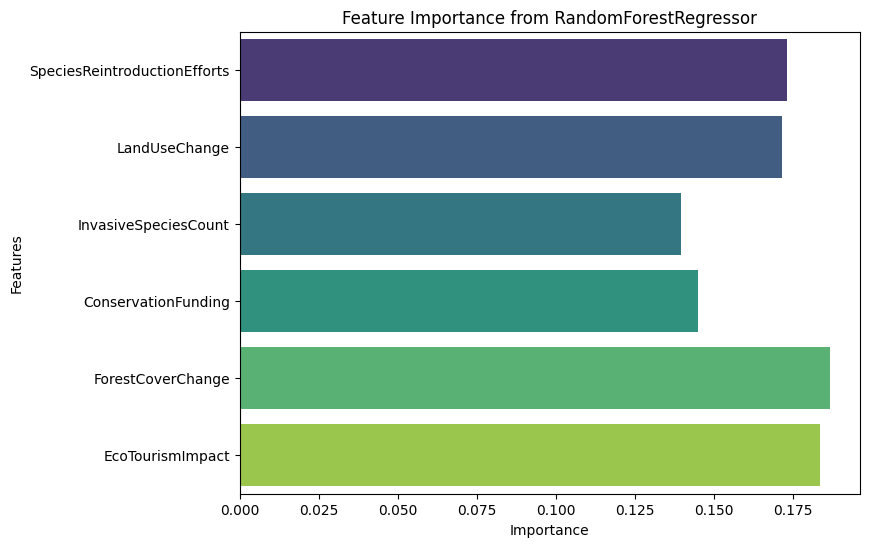

In [95]:
# Feature Importance
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns, palette='viridis', hue=X.columns, legend=False)
plt.title('Feature Importance from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### GradientBoostingRegressor

In [99]:
# GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

### 9. **Model Evaluation**
   - **Metrics**:
     - Mean Squared Error (MSE) for error measurement.
     - R-squared (R²) to evaluate model goodness-of-fit.
   - **Comparison**: Compile MSE and R² scores for all models to identify the best-performing one.


In [121]:
# Model Evaluation
results = pd.DataFrame({
    "Model": ["Bagging", "Boosting", "Linear Regression", "Decision Tree", "SVR", "Voting", "Stacking", "Random Forest", "Gradient Boosting"],
    "MSE": [
        bag_mse,
        boost_mse,
        mean_squared_error(y_test, lin_reg.predict(X_test_scaled)),
        mean_squared_error(y_test, regr_tree.predict(X_test_scaled)),
        mean_squared_error(y_test, sv_reg.predict(X_test_scaled)),
        mean_squared_error(y_test, v_reg.predict(X_test_scaled)),
        mean_squared_error(y_test, s_reg.predict(X_test_scaled)),
        mean_squared_error(y_test, rf_regressor.predict(X_test_scaled)),
        mean_squared_error(y_test, gb_regressor.predict(X_test_scaled))
    ],
    "R2": [
        bag_r2,
        boost_r2,
        r2_score(y_test, lin_reg.predict(X_test_scaled)),
        r2_score(y_test, regr_tree.predict(X_test_scaled)),
        r2_score(y_test, sv_reg.predict(X_test_scaled)),
        r2_score(y_test, v_reg.predict(X_test_scaled)),
        r2_score(y_test, s_reg.predict(X_test_scaled)),
        r2_score(y_test, rf_regressor.predict(X_test_scaled)),
        r2_score(y_test, gb_regressor.predict(X_test_scaled))
    ]
})

# Evaluation of results
print("\nModel Evaluation Results:")
print(results)


Model Evaluation Results:
               Model       MSE        R2
0            Bagging  0.088720 -0.074044
1           Boosting  0.087620 -0.060719
2  Linear Regression  0.086735 -0.050007
3      Decision Tree  0.088407 -0.070254
4                SVR  0.103118 -0.248344
5             Voting  0.093418 -0.130919
6           Stacking  0.084697 -0.025340
7      Random Forest  0.098173 -0.188474
8  Gradient Boosting  0.096595 -0.169375


### 11. **Conclusion**
   - Summarize findings, emphasizing the best model for predicting the Biodiversity Health Index.
   - Discuss potential applications of the model and future improvements.


 **Highlighting poor results**
 
Across all models, the MSE values are relatively high, and R² scores are negative, indicating that the models are not able to explain the variance in the target variable. This aligns with the earlier observation of weak correlations between predictors and the target.

A large part of fitting models to data is knowing when the model is acceptable and when it's almost worse than just using a moving average to suggest future paths. Today was unfortunately one of those days where we'll need to find a different solution, as neither of these models are fit for predicting outputs. It's important to be truthful about models fitting poorly and about models not fitting at all (as we had today). Use the metrics produced to guide you, use the assumptions we introduced in earlier lessons to assess whether data might be appropriate for fitting a model, and only then start the process.